In [7]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

# import sklearn
# import scipy

# from sklearn.naive_bayes import GaussianNB
# import lightgbm as lightgbm
# from xgboost import XGBClassifier
# import keras

# Get Started
# https://github.com/Refinitiv-API-Samples/Article.EikonDataAPI.DotNet.Library
# API limits
# https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/documentation?content=49692&type=documentation_item
import eikon as ek 

from pylab import rcParams
plt.rcParams['figure.figsize'] = 16, 8

In [5]:
# Настройки для графиков, чтобы увеличить шрифты и размеры.
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

plt.rcParams['axes.axisbelow'] = True

In [5]:
# Зададим path для папки проекта и для папок файлов
path_project_folder = 'C:/DAN/t_systems/trade_project/'
folder_name_headlines = 'backup_headlines/'
folder_name_logger = 'logger/'
folder_name_for_labelling = 'for_labelling/'
folder_name_with_labelled_data_iter1 = 'labeled_news_iter1/'

In [7]:
def get_name_of_latest_file_in_folder(folder_name):
    """
    Get all file names in selected direction.
    Return the latest file in that directory.
    """
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "num_time", "str_time"
    ])

    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_folder_and_name'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates
    for i in range(0, len(files_creation_dates)):
        file_folder_and_name = files_creation_dates['file_folder_and_name'][i]
        files_creation_dates['num_time'][i] = os.path.getctime(file_folder_and_name)
        files_creation_dates['str_time'][i] = time.ctime(os.path.getctime(file_folder_and_name))

    latest_file_dir = files_creation_dates.sort_values(by=['num_time'], ascending=False)['file_folder_and_name'].iloc[0]
    
    return latest_file_dir

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import pandas as pd
import pandas as pd
import nltk
nltk.data.path.append('/home/ec2-user/SageMaker/nltk_data')
from nltk.util import ngrams
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer  # simple one
from nltk.stem.snowball import SnowballStemmer  # Porter 2
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import s3fs
import torch
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
from transformers import *
from tqdm import tqdm, trange
from ast import literal_eval
from sklearn import metrics
from transformers import BertTokenizer, BertModel, BertForMaskedLM, BertPreTrainedModel
import boto3
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import pandas as pd
import pandas as pd
import nltk
nltk.data.path.append('/home/ec2-user/SageMaker/nltk_data')
from nltk.util import ngrams
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer  # simple one
from nltk.stem.snowball import SnowballStemmer  # Porter 2
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

import torch
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
from transformers import *
from tqdm import tqdm, trange
from ast import literal_eval
from sklearn import metrics
from transformers import BertTokenizer, BertModel, BertForMaskedLM, BertPreTrainedModel
import boto3
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, Dataset

In [6]:
cuda.is_available()

False

In [7]:
cuda.current_device()

AssertionError: Torch not compiled with CUDA enabled

In [1]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, text_col, target_col, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe[text_col]
        self.targets = dataframe[target_col]
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }
		
		
class BERTMultilabel(torch.nn.Module):
    def __init__(self, num_labels, pretrained_path):
        super(BERTMultilabel, self).__init__()
        self.l1 = BertModel.from_pretrained(pretrained_path)
        self.l2 = torch.nn.Dropout(0.2)
        self.l3 = torch.nn.Linear(768, num_labels)
        print('self.l1:', self.l1) #
        print('self.l2:', self.l2) # 
        print('self.l3:', self.l3) # 
    
    def forward(self, ids, mask, token_type_ids):
        global bug_element# 
        _, output_1 = self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids)
        bug_element = output_1
        print('output_1:', output_1) #
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output


def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)
	
	
def train(model, optimizer, train_loader, device, epoch, verbose=1):
    model.train()
    for _, data in enumerate(train_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        
        if (_%10==0 and verbose == 1) or verbose > 1:                    
            fin_targets = targets.cpu().detach().numpy().tolist()
            fin_outputs = torch.sigmoid(outputs).cpu().detach().numpy().tolist()
            fin_outputs = np.array(fin_outputs) >= 0.5
            accuracy = metrics.accuracy_score(fin_targets, fin_outputs)
            
            print(f'Epoch: {epoch}, Loss:  {loss.item()}, Acc: {accuracy}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
		
		
def validation(model, loader, device, epoch):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets
	
	
	
def run_experiment(train_df, val_df, text_col, verbose=1):
    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)
    print(train_df.shape, val_df.shape)
    
    tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)
    
    training_set = CustomDataset(train_df, text_col, 'list_label', tokenizer, MAX_LEN)
    validation_set = CustomDataset(val_df, text_col, 'list_label', tokenizer, MAX_LEN)


    train_iterations = len(training_set)/BATCH_SIZE
    val_iterations = len(validation_set)/BATCH_SIZE
    
    train_params = {'batch_size': BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

    val_params = {'batch_size': BATCH_SIZE,
                    'shuffle': False,
                    'num_workers': 0
                    }

    train_loader = DataLoader(training_set, **train_params)
    val_loader = DataLoader(validation_set, **val_params)
    
    model = BERTMultilabel(NUM_LABELS, PRETRAINED_PATH)
    model.to(device)
    
    print('Modelling')
    
    optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)
    
    for epoch in range(EPOCHS):
        train(model, optimizer, train_loader, device, epoch, verbose)
    
    epoch = range(EPOCHS)[-1]

    outputs, targets = validation(model, val_loader, device, epoch)
    outputs = np.array(outputs) >= 0.5

    accuracy = metrics.accuracy_score(targets, outputs)
    f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
    f1_score_macro = metrics.f1_score(targets, outputs, average='macro')

    print(f'Epoch: {epoch}, Acc: {accuracy}')
    #     print(f"Accuracy Score = {accuracy}")
    #     print(f"F1 Score (Micro) = {f1_score_micro}")
    #     print(f"F1 Score (Macro) = {f1_score_macro}")
    print(metrics.classification_report(targets, outputs))
    
    return model

NameError: name 'Dataset' is not defined

# Прочитаем файлы с разметкой и соединим их

In [48]:
# Из всех колонок в файлах разметки выберем только колонки разметки
cols_of_labelling = [
#     'Unnamed: 0',
#     'storyId',
#     'versionCreated',
#     'sourceCode',
#     'ric',
#     'story_lang',
#     'Analyst_Rating',
#     'Asset_Sale',
#     'Collaboration',
#     'Contract_-_Agreement_-_Deal',
#     'Credit_Debt_Rating',
#     'Dividend',
#     'Eco_Issues',
#     'Executive_Change',
#     'Financial_Results',
#     'Investigation',
#     'Investment',
#     'Lawsuit',
#     'Merger_and_Acquisition',
#     'Price_Target',
#     'Product_Update',
#     'Security_Protection',
#     'Settlement',
#     'Stock_Buyback',
#     'Workforce_Change',
#     'number_of_types_detected',
#     'headline',
#     'story_wo_html',
    'my_label_Analyst_Rating',
#    'my_label_Asset_Sale',
    'my_label_Collaboration',
    'my_label_Contract_-_Agreement_-_Deal',
    'my_label_Credit_Debt_Rating',
    'my_label_Dividend',
    'my_label_Eco_Issues',
    'my_label_Executive_Change',
    'my_label_Financial_Results',
    'my_label_Investigation',
    'my_label_Investment',
    'my_label_Lawsuit',
#    'my_label_Merger_and_Acquisition',
    'my_label_Price_Target',
    'my_label_Product_Update',
    'my_label_Security_Protection',
    'my_label_Settlement',
    'my_label_Stock_Buyback',
    'my_label_Workforce_Change',
#     'my_label_digest'
]

len(cols_of_labelling)

17

In [49]:
def get_files_name_in_folder(folder_name):
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "num_time", "str_time"
    ])

    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_folder_and_name'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates
    for i in range(0, len(files_creation_dates)):
        file_folder_and_name = files_creation_dates['file_folder_and_name'][i]
        files_creation_dates['num_time'][i] = os.path.getctime(file_folder_and_name)
        files_creation_dates['str_time'][i] = time.ctime(os.path.getctime(file_folder_and_name))
        
    return list(files_creation_dates['file_folder_and_name'])

In [50]:
# Создадим лист только с названиями экселек с разметкой, будем его итерировать
import re

regex_for_filter = re.compile(r'/for_labelling(.*).xlsx')

files_list_labelling = list(filter(
    regex_for_filter.search, 
    get_files_name_in_folder(
        folder_name=path_project_folder+folder_name_with_labelled_data_iter1)
))

len(files_list_labelling)

20

In [51]:
labelling_all_df = pd.DataFrame(data = [], columns=[])

for file_name_now in files_list_labelling:
    # Ранее мы уже создали список файлов с полным путём, проитерируем его
    labelled_slice_now = pd.read_excel(file_name_now)

    # Выберем только столбцы с разметкой и ID новости
    try:
        # Постараем подгрузить и столбец 'my_label_digest'
        # Он означает, что в тексте собраны сразу несколько разнообразных новостей
        labelled_slice_now = labelled_slice_now[
            ['storyId'] + cols_of_labelling + ['my_label_digest']
        ]
    except Exception as e:
        # Если не получилось, попробуем без этого столбца
        # print(e, end=' ')
        labelled_slice_now = labelled_slice_now[
            ['storyId'] + cols_of_labelling
        ]        

    # Заменим пропуски на нули. Ноль - новость не про данный тип события
    labelled_slice_now = labelled_slice_now
    labelled_slice_now['labels_sum'] = labelled_slice_now.sum(axis=1)
    labelled_slice_now = labelled_slice_now[labelled_slice_now['labels_sum'] > 0].reset_index(drop=True)

    print(labelled_slice_now.shape[0], end=' ')
    
    labelling_all_df = labelling_all_df.append(labelled_slice_now, ignore_index = True)
    
    print(labelling_all_df.shape[0], end=' ')
    
    print(file_name_now)

labelling_all_df = labelling_all_df.replace(np.nan, 0)
labelling_all_df = labelling_all_df.drop(columns=['labels_sum'])

# Заменим все двойки и едницы на единицы, оставив лишь два возможные метки
labelling_all_df = labelling_all_df.replace(2, 1)
labelling_all_df = labelling_all_df.replace(1, 1)
labelling_all_df = labelling_all_df.replace(0, 0)

1 1 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling2_Merger_and_Acquisition.xlsx
100 101 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Analyst_Rating.xlsx
0 101 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Asset_Sale.xlsx
43 144 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Collaboration.xlsx
51 195 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Contract_-_Agreement_-_Deal.xlsx
22 217 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Credit_Debt_Rating.xlsx
64 281 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Dividend.xlsx
44 325 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Eco_Issues.xlsx
37 362 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Executive_Change.xlsx
80 442 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Financial_Results.xlsx
64 506 C:/DAN/t_systems/trade_project/labeled_news_iter1/for_labelling_Invest

918.0


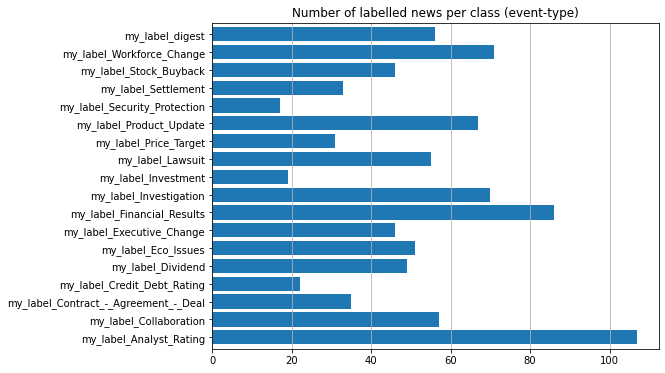

In [52]:
print(
    labelling_all_df[cols_of_labelling + ['my_label_digest']].sum().sum()
)
(labelling_all_df[cols_of_labelling + ['my_label_digest']].sum()).plot(kind='barh', width=0.8, figsize=(8,6))
plt.title('Number of labelled news per class (event-type)')
plt.grid(True, axis='x')

In [53]:
labelling_all_df['list_label'] = labelling_all_df[cols_of_labelling + ['my_label_digest']].values.tolist()
labelling_all_df.tail(1)

,storyId,my_label_Analyst_Rating,my_label_Collaboration,my_label_Contract_-_Agreement_-_Deal,my_label_Credit_Debt_Rating,my_label_Dividend,my_label_Eco_Issues,my_label_Executive_Change,my_label_Financial_Results,my_label_Investigation,my_label_Investment,my_label_Lawsuit,my_label_Price_Target,my_label_Product_Update,my_label_Security_Protection,my_label_Settlement,my_label_Stock_Buyback,my_label_Workforce_Change,my_label_digest,list_label
850,urn:newsml:reuters.com:20191209:nNRAaepw3s:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [54]:
labelling_all_df.sum()

storyId                                 urn:newsml:reuters.com:20201022:nNDL3RTZ1L:1ur...
my_label_Analyst_Rating                                                               107
my_label_Collaboration                                                                 57
my_label_Contract_-_Agreement_-_Deal                                                   35
my_label_Credit_Debt_Rating                                                            22
my_label_Dividend                                                                      49
my_label_Eco_Issues                                                                    51
my_label_Executive_Change                                                              46
my_label_Financial_Results                                                             86
my_label_Investigation                                                                 70
my_label_Investment                                                                    19
my_label_L

In [41]:
file_path = path_project_folder + 'labelling_all_df' + '.csv'
labelling_all_df.to_csv(file_path, index=False)

In [13]:
labelling_all_df.columns

Index(['storyId', 'my_label_Analyst_Rating', 'my_label_Asset_Sale',
       'my_label_Collaboration', 'my_label_Contract_-_Agreement_-_Deal',
       'my_label_Credit_Debt_Rating', 'my_label_Dividend',
       'my_label_Eco_Issues', 'my_label_Executive_Change',
       'my_label_Financial_Results', 'my_label_Investigation',
       'my_label_Investment', 'my_label_Lawsuit',
       'my_label_Merger_and_Acquisition', 'my_label_Price_Target',
       'my_label_Product_Update', 'my_label_Security_Protection',
       'my_label_Settlement', 'my_label_Stock_Buyback',
       'my_label_Workforce_Change', 'my_label_digest', 'list_label'],
      dtype='object')

# Разделим на train, validation и test выборки

In [12]:
# Може подгрузить csv, если хотим откатиться и не пересчитывать
key_words_detection_df = pd.read_csv(path_project_folder + "key_words_detection_df.csv")
print(key_words_detection_df.shape)

(257644, 109)


In [55]:
# Добавим тексты к нашему датасету с разметкой
lower_labelled_texts_list_types = pd.merge(
    key_words_detection_df, 
    labelling_all_df[['storyId', 'list_label']], 
    how="right", 
    on='storyId'
).drop_duplicates(
    subset=['storyId'], 
    keep='first'
).reset_index(drop=True) # [['story_wo_html', 'list_label']]

lower_labelled_texts_list_types['story_wo_html_lower'] = lower_labelled_texts_list_types['story_wo_html'].str.lower()
lower_labelled_texts_list_types = lower_labelled_texts_list_types.drop(columns=['story_wo_html'])

lower_labelled_texts_list_types = lower_labelled_texts_list_types[['story_wo_html_lower', 'list_label']]

In [56]:
lower_labelled_texts_one_type = pd.merge(
    key_words_detection_df, 
    labelling_all_df[['storyId', 'my_label_Executive_Change']], 
    how="right", 
    on='storyId'
).drop_duplicates(
    subset=['storyId'], 
    keep='first'
).reset_index(drop=True)[['story_wo_html', 'my_label_Executive_Change']]

lower_labelled_texts_one_type['story_wo_html_lower'] = lower_labelled_texts_one_type['story_wo_html'].str.lower()
lower_labelled_texts_one_type = lower_labelled_texts_one_type.drop(columns=['story_wo_html'])

lower_labelled_texts_one_type = lower_labelled_texts_one_type[['story_wo_html_lower', 'my_label_Executive_Change']]

In [57]:
print(
    'Number of labels:',
    len(lower_labelled_texts_list_types['list_label'][1])
)

Number of labels: 18


In [64]:
df = lower_labelled_texts_list_types['list_label'].apply(pd.Series)

df['story_wo_html_lower'] = lower_labelled_texts_list_types['story_wo_html_lower']
list(df.sum()[:len(cols_of_labelling) + 1])

[97.0,
 52.0,
 29.0,
 20.0,
 46.0,
 47.0,
 43.0,
 82.0,
 62.0,
 18.0,
 46.0,
 26.0,
 66.0,
 17.0,
 28.0,
 42.0,
 68.0,
 22.0]

In [65]:
lower_labelled_texts_list_types.to_csv(path_project_folder + 'lower_labelled_texts_list_types.csv')
lower_labelled_texts_one_type.to_csv(path_project_folder + 'lower_labelled_texts_one_type.csv')

# Попытка сделать по коду Влада

In [21]:
random=69420

train_df, val_df = train_test_split(
    lower_labelled_texts_list_types, 
    test_size=0.30, 
    random_state=random)
print(train_df.shape, val_df.shape)

(532, 2) (229, 2)


In [53]:
NUM_LABELS = 20
PRETRAINED_PATH = 'bert-base-multilingual-uncased' # C:/DAN/t_systems/trade_project/BERT_pretrained/multilingual_L-12_H-768_A-12/
PRE_TRAINED_MODEL = 'bert-base-multilingual-uncased' 
MAX_LEN = 512
BATCH_SIZE = 4
LEARNING_RATE = 0.1
EPOCHS = 1

In [23]:
from transformers import BertForMaskedLM

model = BertForMaskedLM.from_pretrained("bert-base-multilingual-uncased")

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [66]:
model = run_experiment(
    train_df, 
    val_df, 
    text_col = 'story_wo_html_lower',
    verbose=2
)

(532, 2) (229, 2)
self.l1: BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(105879, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.

TypeError: dropout(): argument 'input' (position 1) must be Tensor, not str

TypeError: dropout(): argument 'input' (position 1) must be Tensor, not str

In [64]:
bug_element

'pooler_output'

# Неудачная попытка сделать по чужому коду

In [40]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [41]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [47]:
tokenized = df['story_wo_html_lower'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True)))

In [49]:
input_ids = torch.tensor(np.array(padded))

with torch.no_grad():
    last_hidden_states = model(input_ids)

NameError: name 'padded' is not defined

# Попытка 1 после Москвы построить нейронку

https://medium.com/huggingface/multi-label-text-classification-using-bert-the-mighty-transformer-69714fa3fb3d

The model is also pre-trained on two unsupervised tasks, masked language modeling and next sentence prediction.

Bert input leght limitation

We will convert the InputExample to the feature that is understood by BERT. The feature will be represented by class InputFeatures.
- input_ids: list of numerical ids for the tokenised text
- input_mask: will be set to 1 for real tokens and 0 for the padding tokens
- segment_ids: for our case, this will be set to the list of ones
- label_ids: one-hot encoded labels for the text

PreTrainedBertModel - не знает, что это за сущность

In [7]:
class InputExample(object):
    """A single training/test example for sequence classification."""

    def __init__(self, guid, text_a, text_b=None, labels=None):
        """Constructs a InputExample.
        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            labels: (Optional) [string]. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.labels = labels

In [8]:
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_ids):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_ids = label_ids

We will adapt BertForSequenceClassification class to cater for multi-label classification.

In [10]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello world!", return_tensors="pt")
outputs = model(**inputs)

ImportError: 
AutoModel requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.


In [24]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [25]:
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM


In [32]:
class BertForMultiLabelSequenceClassification(BertModel): # PreTrainedBertModel
    """BERT model for classification.
    This module is composed of the BERT model with a linear layer on top of
    the pooled output.
    """
    def __init__(self, config, num_labels=2):
        super(BertForMultiLabelSequenceClassification, self).__init__(config)
        self.num_labels = num_labels
        self.bert = BertModel(config)
        self.dropout = torch.nn.Dropout(config.hidden_dropout_prob)
        self.classifier = torch.nn.Linear(config.hidden_size, num_labels)
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _, pooled_output = self.bert(input_ids, token_type_ids, attention_mask, output_all_encoded_layers=False)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        if labels is not None:
            loss_fct = BCEWithLogitsLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1, self.num_labels))
            return loss
        else:
            return logits
        
    def freeze_bert_encoder(self):
        for param in self.bert.parameters():
            param.requires_grad = False
    
    def unfreeze_bert_encoder(self):
        for param in self.bert.parameters():
            param.requires_grad = True

In [39]:
num_labels = 21 # ДОБАВИЛ Я

all_labels = [ # ДОБАВИЛ Я
    'my_label_Analyst_Rating', 'my_label_Asset_Sale',
    'my_label_Collaboration', 'my_label_Contract_-_Agreement_-_Deal',
    'my_label_Credit_Debt_Rating', 'my_label_Dividend',
    'my_label_Eco_Issues', 'my_label_Executive_Change',
    'my_label_Financial_Results', 'my_label_Investigation',
    'my_label_Investment', 'my_label_Lawsuit',
    'my_label_Merger_and_Acquisition', 'my_label_Price_Target',
    'my_label_Product_Update', 'my_label_Security_Protection',
    'my_label_Settlement', 'my_label_Stock_Buyback',
    'my_label_Workforce_Change', 'my_label_digest'
]

In [40]:
from torch import Tensor

def accuracy_thresh(y_pred:Tensor, y_true:Tensor, thresh:float=0.5, sigmoid:bool=True):
    "Compute accuracy when `y_pred` and `y_true` are the same size."
    if sigmoid: y_pred = y_pred.sigmoid()

    return np.mean(((y_pred>thresh)==y_true.byte()).float().cpu().numpy(), axis=1).sum()



from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], all_logits[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels.ravel(), all_logits.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

TypeError: list indices must be integers or slices, not tuple

# Попытка 2 после Москвы

https://www.kaggle.com/notebooks?sortBy=voteCount&searchQuery=bert

Попробовал код ниже - не подгружается библиотека fastai.callbacks

Рекомендуют сделать среду с помощью конды

In [36]:
import numpy as np
import pandas as pd

from pathlib import Path
from typing import *

import torch
import torch.optim as optim

In [43]:
import fastbook
fastbook.setup_book()

c:\python37\lib\site-packages\fastbook\__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [45]:
from fastai import *
from fastai.vision import *
from fastai.text import *

# ВОТ ЭТА СТРОЧКА НЕ ПОДГРУЖАЕТСЯ
from fastai.callbacks import *

In [46]:
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)

config = Config(
    testing=False,
    bert_model_name="bert-base-uncased",
    max_lr=3e-5,
    epochs=4,
    use_fp16=True,
    bs=32,
    discriminative=False,
    max_seq_len=256,
)

In [52]:
from pytorch_pretrained_bert import BertTokenizer
bert_tok = BertTokenizer.from_pretrained(
    config.bert_model_name,
)

In [49]:
def _join_texts(texts:Collection[str], mark_fields:bool=False, sos_token:Optional[str]='BOS'):
    """Borrowed from fast.ai source"""
    if not isinstance(texts, np.ndarray): texts = np.array(texts)
    if is1d(texts): texts = texts[:,None]
    df = pd.DataFrame({i:texts[:,i] for i in range(texts.shape[1])})
    text_col = f'{FLD} {1} ' + df[0].astype(str) if mark_fields else df[0].astype(str)
    if sos_token is not None: text_col = f"{sos_token} " + text_col
    for i in range(1,len(df.columns)):
        #text_col += (f' {FLD} {i+1} ' if mark_fields else ' ') + df[i]
        text_col += (f' {FLD} {i+1} ' if mark_fields else ' ') + df[i].astype(str)
    return text_col.values

In [51]:
class FastAiBertTokenizer(BaseTokenizer):
    """Wrapper around BertTokenizer to be compatible with fast.ai"""
    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int=128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length"""
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

NameError: name 'BaseTokenizer' is not defined

# Попытка 3 после Москвы

https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP#scrollTo=cfNIhN19te3N

Мне кажется, не сработало на моих данных, потому что там размечают предложения и вставляют PAD SEP CLS куда надо, если бы текст был бы просто предложением

# Попытка 4 после Москвы

https://www.youtube.com/watch?v=wG2J_MJEjSQ


# Попытка 5 после Москвы

In [10]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf

In [11]:
train_path = path_project_folder + 'toxic_comments/train.csv'
test_path = path_project_folder + 'toxic_comments/test.csv'
test_labels_path = path_project_folder + 'toxic_comments/test_labels.csv'
subm_path = path_project_folder + 'toxic_comments/sample_submission.csv'

In [12]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_test_labels = pd.read_csv(test_labels_path)
df_test_labels = df_test_labels.set_index('id')

df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences

bert_model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(bert_model_name, do_lower_case=True)
MAX_LEN = 128

def tokenize_sentences(sentences, tokenizer, max_seq_len = 128):
    tokenized_sentences = []

    for sentence in tqdm(sentences):
        tokenized_sentence = tokenizer.encode(
                            sentence,                  # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_seq_len,  # Truncate all sentences.
                    )
        
        tokenized_sentences.append(tokenized_sentence)

    return tokenized_sentences

def create_attention_masks(tokenized_and_padded_sentences):
    attention_masks = []

    for sentence in tokenized_and_padded_sentences:
        att_mask = [int(token_id > 0) for token_id in sentence]
        attention_masks.append(att_mask)

    return np.asarray(attention_masks)

input_ids = tokenize_sentences(df_train['comment_text'], tokenizer, MAX_LEN)
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
attention_masks = create_attention_masks(input_ids)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
from sklearn.model_selection import train_test_split

labels =  df_train[label_cols].values

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=0, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, random_state=0, test_size=0.1)

train_size = len(train_inputs)
validation_size = len(validation_inputs)

In [ ]:
BATCH_SIZE = 32
NR_EPOCHS = 1

def create_dataset(data_tuple, epochs=1, batch_size=32, buffer_size=10000, train=True):
    dataset = tf.data.Dataset.from_tensor_slices(data_tuple)
    if train:
        dataset = dataset.shuffle(buffer_size=buffer_size)
    dataset = dataset.repeat(epochs)
    dataset = dataset.batch(batch_size)
    if train:
        dataset = dataset.prefetch(1)
    
    return dataset

train_dataset = create_dataset((train_inputs, train_masks, train_labels), epochs=NR_EPOCHS, batch_size=BATCH_SIZE)
validation_dataset = create_dataset((validation_inputs, validation_masks, validation_labels), epochs=NR_EPOCHS, batch_size=BATCH_SIZE)

In [ ]:
from transformers import TFBertModel
from tensorflow.keras.layers import Dense, Flatten

class BertClassifier(tf.keras.Model):    
    def __init__(self, bert: TFBertModel, num_classes: int):
        super().__init__()
        self.bert = bert
        self.classifier = Dense(num_classes, activation='sigmoid')
        
    @tf.function
    def call(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None):
        outputs = self.bert(input_ids,
                               attention_mask=attention_mask,
                               token_type_ids=token_type_ids,
                               position_ids=position_ids,
                               head_mask=head_mask)
        cls_output = outputs[1]
        cls_output = self.classifier(cls_output)
                
        return cls_output

model = BertClassifier(TFBertModel.from_pretrained(bert_model_name), len(label_cols))

In [ ]:
import time
from transformers import create_optimizer

steps_per_epoch = train_size // BATCH_SIZE
validation_steps = validation_size // BATCH_SIZE

# | Loss Function
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=False)
train_loss = tf.keras.metrics.Mean(name='train_loss')
validation_loss = tf.keras.metrics.Mean(name='test_loss')

# | Optimizer (with 1-cycle-policy)
warmup_steps = steps_per_epoch // 3
total_steps = steps_per_epoch * NR_EPOCHS - warmup_steps
optimizer = create_optimizer(init_lr=2e-5, num_train_steps=total_steps, num_warmup_steps=warmup_steps)

# | Metrics
train_auc_metrics = [tf.keras.metrics.AUC() for i in range(len(label_cols))]
validation_auc_metrics = [tf.keras.metrics.AUC() for i in range(len(label_cols))]

@tf.function
def train_step(model, token_ids, masks, labels):
    labels = tf.dtypes.cast(labels, tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(token_ids, attention_mask=masks)
        loss = loss_object(labels, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables), 1.0)

    train_loss(loss)

    for i, auc in enumerate(train_auc_metrics):
        auc.update_state(labels[:,i], predictions[:,i])
        
@tf.function
def validation_step(model, token_ids, masks, labels):
    labels = tf.dtypes.cast(labels, tf.float32)

    predictions = model(token_ids, attention_mask=masks, training=False)
    v_loss = loss_object(labels, predictions)

    validation_loss(v_loss)
    for i, auc in enumerate(validation_auc_metrics):
        auc.update_state(labels[:,i], predictions[:,i])
                                              
def train(model, train_dataset, val_dataset, train_steps_per_epoch, val_steps_per_epoch, epochs):
    for epoch in range(epochs):
        print('=' * 50, f"EPOCH {epoch}", '=' * 50)

        start = time.time()

        for i, (token_ids, masks, labels) in enumerate(tqdm(train_dataset, total=train_steps_per_epoch)):
            train_step(model, token_ids, masks, labels)
            if i % 1000 == 0:
                print(f'\nTrain Step: {i}, Loss: {train_loss.result()}')
                for i, label_name in enumerate(label_cols):
                    print(f"{label_name} roc_auc {train_auc_metrics[i].result()}")
                    train_auc_metrics[i].reset_states()
        
        for i, (token_ids, masks, labels) in enumerate(tqdm(val_dataset, total=val_steps_per_epoch)):
            validation_step(model, token_ids, masks, labels)

        print(f'\nEpoch {epoch+1}, Validation Loss: {validation_loss.result()}, Time: {time.time()-start}\n')

        for i, label_name in enumerate(label_cols):
            print(f"{label_name} roc_auc {validation_auc_metrics[i].result()}")
            validation_auc_metrics[i].reset_states()

        print('\n')

        
train(model, train_dataset, validation_dataset, train_steps_per_epoch=steps_per_epoch, val_steps_per_epoch=validation_steps, epochs=NR_EPOCHS)